torch.Size([1170, 1, 300])


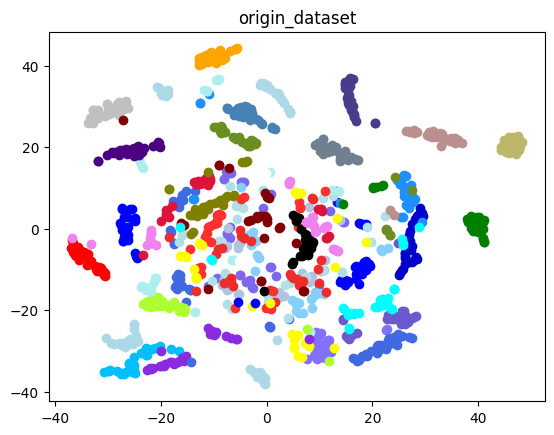

torch.Size([1170, 600])


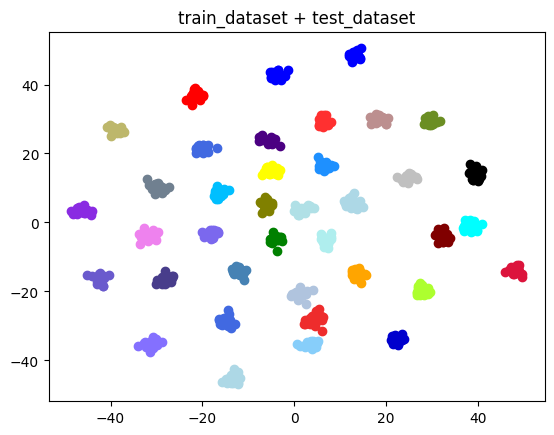

In [1]:
from sklearn.decomposition import PCA
import torch
from sklearn.manifold import TSNE
from Metric_learning_local import *
from FingerPrint_1_quick import *

# x = torch.rand(240,600)

colorlist = [
    '#483D8B',
    '#6A5ACD',
    '#7B68EE',
    '#8470FF',
    '#0000CD',
    '#4169E1',
    '#0000FF',
    '#1E90FF',
    '#00BFFF',
    '#87CEFA',
    '#4682B4',
    '#B0C4DE',
    '#ADD8E6',
    '#B0E0E6',
    '#AFEEEE',
    '#FF3030',
    '#EE2C2C',
    'black',
    'red',
    'silver',
    'w',
    'maroon',
    'yellow',
    'orange',
    'green',
    'blue',
    'blueviolet',
    'violet',
    'cyan',
    'lightblue',
    'greenyellow',
    'rosybrown',
    'crimson',
    'indigo',
    'darkkhaki',
    'olive',
    'olivedrab',
    'slategray',
    'royalblue',
    'midnightblue',
    'purple',
    'deeppink',
]

Pathlist = [
    '/root/zqh/NewDataSet/New_data_pa1.pt',
    '/root/zqh/NewDataSet/New_data_pa2.pt',
    '/root/zqh/NewDataSet/New_data_pa3.pt',
    '/root/zqh/NewDataSet/New_data_pa5.pt',
    '/root/zqh/NewDataSet/New_data_pa6.pt',
    '/root/zqh/NewDataSet/New_data_pa7.pt',
    '/root/zqh/NewDataSet/New_data_pa8.pt',
    '/root/zqh/NewDataSet/New_data_pa9.pt',
    '/root/zqh/NewDataSet/New_data_pa10.pt',
    '/root/zqh/NewDataSet/New_data_pa11.pt', # poor
    '/root/zqh/NewDataSet/New_data_pa12.pt',
    '/root/zqh/NewDataSet/New_data_pa13.pt', # poor
    '/root/zqh/NewDataSet/New_data_pa14.pt',
    '/root/zqh/NewDataSet/New_data_pa15.pt', # poor
    '/root/zqh/NewDataSet/New_data_pa16.pt', # poor
    '/root/zqh/NewDataSet/New_data_pa17.pt',
    '/root/zqh/NewDataSet/New_data_pa18.pt',
    '/root/zqh/NewDataSet/New_data_pa19.pt',
    '/root/zqh/NewDataSet/New_data_pa20.pt',
    '/root/zqh/NewDataSet/New_data_pa21.pt',
    '/root/zqh/NewDataSet/New_data_pa22.pt',
    '/root/zqh/NewDataSet/New_data_pa23.pt',
    '/root/zqh/NewDataSet/New_data_pa24.pt', # poor
    '/root/zqh/NewDataSet/New_data_pa25.pt',
    '/root/zqh/NewDataSet/New_data_pa26.pt',
    '/root/zqh/NewDataSet/New_data_pa27.pt',
    '/root/zqh/NewDataSet/New_data_pa28.pt',
    '/root/zqh/NewDataSet/New_data_pa29.pt',
    '/root/zqh/NewDataSet/New_data_pa30.pt', # poor
    '/root/zqh/NewDataSet/New_data_pa31.pt',
    '/root/zqh/NewDataSet/New_data_pa32.pt', # poor
    '/root/zqh/NewDataSet/New_data_pa33.pt',
    '/root/zqh/NewDataSet/New_data_pa34.pt',
    '/root/zqh/NewDataSet/New_data_pa35.pt',
    '/root/zqh/NewDataSet/New_data_pa36.pt',
    '/root/zqh/NewDataSet/New_data_pa37.pt',
    '/root/zqh/NewDataSet/New_data_pa38.pt',
    '/root/zqh/NewDataSet/New_data_pa39.pt',
    '/root/zqh/NewDataSet/New_data_pa40.pt',
    # '/root/zqh/BCGDataSet/modify_extract_Single_resolution_caoan615.pt',
    # '/root/zqh/BCGDataSet/modify_extract_Single_resolution_dj613.pt',
    # '/root/zqh/BCGDataSet/modify_extract_Single_resolution_dxt613.pt',
    # '/root/zqh/BCGDataSet/modify_extract_Single_resolution_ltm613.pt',
    # '/root/zqh/BCGDataSet/modify_extract_Single_resolution_qjf612.pt',
    # '/root/zqh/BCGDataSet/modify_extract_Single_resolution_rrx613.pt',
    # '/root/zqh/BCGDataSet/modify_extract_Single_resolution_sample1.pt',
    # '/root/zqh/BCGDataSet/modify_extract_Single_resolution_sjj612.pt',
    # '/root/zqh/BCGDataSet/modify_extract_Single_resolution_tt612.pt',
    # '/root/zqh/BCGDataSet/modify_extract_Single_resolution_wcm612.pt',
    # '/root/zqh/BCGDataSet/modify_extract_Single_resolution_wg613.pt',
    # '/root/zqh/BCGDataSet/modify_extract_Single_resolution_whd612.pt',
    # '/root/zqh/BCGDataSet/modify_extract_Single_resolution_wxy.pt',
    # '/root/zqh/BCGDataSet/modify_extract_Single_resolution_zj612.pt',
    # '/root/zqh/BCGDataSet/modify_extract_Single_resolution_zqh1.pt',
    # '/root/zqh/BCGDataSet/modify_extract_Single_resolution_zzp612.pt',
]

persons = len(Pathlist)
oneperson_begin = 0
oneperson_end = 30
oneperson_nums = oneperson_end - oneperson_begin
x = get_ResUnet_data(Pathlist=Pathlist, oneperson_begin=oneperson_begin, oneperson_end=oneperson_end)
x = x[:,:,:].detach()
input = x.clone()
print(x.shape)

x = x.squeeze(1).detach().cpu()
pca = PCA(n_components=40)
x = pca.fit_transform(x)
tsne = TSNE(n_components=2)
x = tsne.fit_transform(x)
plt.title('origin_dataset')
for i in range(persons):
    # fig = plt.figure()
    plt.plot(x[i*oneperson_nums:(i+1)*oneperson_nums,0:1],
             x[i*oneperson_nums:(i+1)*oneperson_nums,1:2],
             'o',
             color=colorlist[i])
# plt.show()
# plt.plot(feature[persons*oneperson_nums:,0:1],
#          feature[persons*oneperson_nums:,1:2],
#          'o',)
plt.show()

# pca = PCA(n_components=40)
#
# ans = pca.fit_transform(x)
#
# tsne = TSNE(n_components=2)
#
# ans2 = tsne.fit_transform(ans)

# feature = torch.load('D:/zqh/BCG125hz_Dataset/0522TRM_Unet_kansas_24_30_1_600_onefenbianlv_300.pt').squeeze(1)
# from United_model import *
# from Metric_learning import *
United_model_test = torch.load('/root/zqh/Save_Model/United_model_device.pth').cuda()
Metric_model_test = torch.load('/root/zqh/Save_Model/train_Metric_Model_local.pth').cuda()

feature1, ans, feature2 = United_model_test(input.cuda())
feature = feature2
feature = Metric_model_test(feature)
print(feature.shape)
# feature = x
# pca降维 将600维降维到40维
feature = feature.detach().cpu()
pca = PCA(n_components=20)
feature = pca.fit_transform(feature)
tsne = TSNE(n_components=2)
feature = tsne.fit_transform(feature)

zaosheng = torch.randn(feature.shape)
feature = torch.tensor(feature) + zaosheng
feature = feature.numpy()
# 黑色 第一个 0 10 11
# plt.title('train_dataset')
# for i in range(24):
#     # fig = plt.figure()
#     plt.title(i)
#     plt.plot(feature[i*oneperson_nums:i*oneperson_nums+15,0:1],
#              feature[i*oneperson_nums:i*oneperson_nums+15,1:2],
#              'o',
#              color=colorlist[i])
#     # plt.show()
# plt.show()
# plt.plot(feature[persons*oneperson_nums:,0:1],
#          feature[persons*oneperson_nums:,1:2],
#          'o',)
# plt.show()

plt.title('train_dataset + test_dataset')

for i in range(persons):
    # fig = plt.figure()
    plt.plot(feature[i*oneperson_nums:(i+1)*oneperson_nums-10,0:1],
             feature[i*oneperson_nums:(i+1)*oneperson_nums-10,1:2],
             'o',
             color=colorlist[i])
# plt.show()
# plt.plot(feature[persons*oneperson_nums:,0:1],
#          feature[persons*oneperson_nums:,1:2],
#          'o',)
plt.show()
